# Homework 02

Importing all the required libraries to complete the assignment

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### Task 1:
Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)).

In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total).

Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

In order to extract this information, we first examined the webpage using Postman Interceptor. We discovered that the data is not found in the html, rather it is imported from a [json file](https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508627223168) requested from the server.

So we make a request for this same file, and import the data from the json to a dataframe.

Since the data is sorted, we trim the dataframe to have only the top 200 results. Thus we have the Name, Rank, Country and Region for each of these universities. We drop the columns we do not require.

In order to get the remaining data, we keep the url column for now.

In [37]:
#import topuni data
topuni_url = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508627223168'
request = requests.get(topuni_url)
topuni_data = request.json()['data']

#add data to dataframe
topuni_df = pd.io.json.json_normalize(topuni_data)

#trim data frame to top 200 universities
topuni_df = topuni_df.head(200)

#drop columns that we don't need
topuni_df = topuni_df.drop(["cc", "core_id","logo","guide","nid","score","stars"],axis=1)

topuni_df.head()

,country,rank_display,region,title,url
0,United States,1,North America,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,United States,2,North America,Stanford University,/universities/stanford-university
2,United States,3,North America,Harvard University,/universities/harvard-university
3,United States,4,North America,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,United Kingdom,5,Europe,University of Cambridge,/universities/university-cambridge


Now we defined the `get_university_data()` function. This function takes the university url, and returns the data on student numbers (total and international) and faculty numbers (total and international).

To do so it uses the BeautifulSoup library.

In [38]:
#cleans the result, and returns an int.
def result2int(result):
    return int(result.replace('\n','').replace(' ','').replace(',',''))

#searches the soup for the class we are looking for, and once found returns the relevant data. If not found, returns NaN.
def search_uni_soup(soup, class_name):
    try:
        search_lv1 = soup.find('div',class_=class_name)
        search_lv2 = search_lv1.find('div',class_='number').text
        return result2int(search_lv2)
    except:
        return np.nan

def get_university_data(uni_url):
    req = requests.get('https://www.topuniversities.com'+uni_url)
    page_body = req.text
    soup = BeautifulSoup(page_body, 'html.parser')
    total_student = search_uni_soup(soup, 'total student')
    inter_student = search_uni_soup(soup, 'total inter')
    total_faculty = search_uni_soup(soup, 'total faculty')
    inter_faculty = search_uni_soup(soup, 'inter faculty')
    return total_student, inter_student, total_faculty, inter_faculty

#testing to see if get_university function is working
get_university_data('/universities/stanford-university')

(15878, 3611, 4285, 2042)

Next we decided to go through the results to see if we were having any errors. The code crashed on New York University, so we went back to the function and handled numbers not found as NaN. After this we parsed through all the results and saw that New York University and Indian Institute of Science Bangalore were the only 2 rows that had NaNs. We will have to handle these special cases.

In [39]:
#add uni data to the data frame
for index, url in enumerate(topuni_df['url']):
    print(get_university_data(url), url)

#results show error on New York University and Indian Institute of Science Bangalore. Need to handle these NaNs.

(11067, 3717, 2982, 1679) /universities/massachusetts-institute-technology-mit
(15878, 3611, 4285, 2042) /universities/stanford-university
(22429, 5266, 4350, 1311) /universities/harvard-university
(2255, 647, 953, 350) /universities/california-institute-technology-caltech
(18770, 6699, 5490, 2278) /universities/university-cambridge
(19720, 7353, 6750, 2964) /universities/university-oxford
(31080, 14854, 6345, 2554) /universities/ucl-university-college-london
(16090, 8746, 3930, 2071) /universities/imperial-college-london
(13557, 3379, 2449, 635) /universities/university-chicago
(19815, 7563, 2477, 1886) /universities/eth-zurich-swiss-federal-institute-technology
(25738, 7251, 4338, 2993) /universities/nanyang-technological-university-singapore-ntu
(10343, 5896, 1695, 1300) /universities/ecole-polytechnique-f%C3%A9d%C3%A9rale-de-lausanne-epfl
(8069, 1793, 1007, 246) /universities/princeton-university
(21904, 5411, 2718, 970) /universities/cornell-university
(32728, 8917, 5106, 3086) /u

(16135, 6806, 1885, 801) /universities/queen-mary-university-london
(18660, 1787, 2858, 246) /universities/kyushu-university
(35504, 4683, 3920, 473) /universities/university-maryland-college-park
(39112, 9688, 2961, 1037) /universities/universite-de-montreal
(24305, 4213, 2273, 253) /universities/universit%C3%A9-pierre-et-marie-curie-upmc
(38749, 9170, 3124, 551) /universities/university-southern-california
(9257, 1465, 1077, 336) /universities/chalmers-university-technology
(23149, 2128, 1449, 267) /universities/university-california-santa-barbara-ucsb
(12300, 4464, 1245, 435) /universities/lancaster-university
(15999, 3364, 1833, 636) /universities/university-york
(24565, 6090, 2755, 705) /universities/cardiff-university
(27003, 991, 2260, 198) /universities/pontificia-universidad-cat%C3%B3lica-de-chile-uc
(12147, 1831, 1257, 370) /universities/aalto-university
(23702, 3548, 3231, 1170) /universities/mcmaster-university
(44517, 8556, 3176, 449) /universities/rwth-aachen-university
(

Now that we know our functions are working we add the new columns to our dataframe.

In [40]:
#adding columns for total students and international students
topuni_df["Total Students"] = topuni_df['url'].map(lambda x : get_university_data(x)[0])
topuni_df["International Students"] = topuni_df['url'].map(lambda x : get_university_data(x)[1])

In [41]:
#adding columns for total faculty and international faculty
topuni_df["Total Faculty"] = topuni_df['url'].map(lambda x : get_university_data(x)[2])
topuni_df["International Faculty"] = topuni_df['url'].map(lambda x : get_university_data(x)[3])

We can now drop the url column

In [42]:
#drop columns that we don't need
topuni_df = topuni_df.drop(["url"],axis=1)
topuni_df.head()

,country,rank_display,region,title,Total Students,International Students,Total Faculty,International Faculty
0,United States,1,North America,Massachusetts Institute of Technology (MIT),11067.0,3717.0,2982.0,1679.0
1,United States,2,North America,Stanford University,15878.0,3611.0,4285.0,2042.0
2,United States,3,North America,Harvard University,22429.0,5266.0,4350.0,1311.0
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0


Now that we have our data we can solve the questions.
#### a) Which are the best universities in terms of the ratio between faculty and students?
To answer this question we will add a new column which computes this ratio, and sort our dataframe by this value. We assume that the higher the ratio, the better the university. (1 faculty : 5 students is better than 1 faculty : 10 students)

In [43]:
topuni_df["Faculty/Student ratio"] = topuni_df['Total Faculty']/topuni_df['Total Students']
topuni_df.sort_values("Faculty/Student ratio",ascending=False).head()

,country,rank_display,region,title,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0,0.422616
15,United States,16,North America,Yale University,12402.0,2469.0,4940.0,1708.0,0.398323
5,United Kingdom,6,Europe,University of Oxford,19720.0,7353.0,6750.0,2964.0,0.342292
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0,0.292488
16,United States,17,North America,Johns Hopkins University,16146.0,4105.0,4462.0,1061.0,0.276353


The best university in terms of Faculty:Student ratio is **California Institute of Technology (Caltech)**

#### b) Which are the best universities in terms of the ratio of international students
To answer this question we will add a new column which computes the ratio between international students and total students, and sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 international : 5 total is better than 1 international : 10 total)

In [44]:
topuni_df["Inter/Total student ratio"] = topuni_df['International Students']/topuni_df['Total Students']
topuni_df.sort_values("Inter/Total student ratio",ascending=False).head()

,country,rank_display,region,title,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,9760.0,6748.0,1088.0,687.0,0.111475,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),10343.0,5896.0,1695.0,1300.0,0.163879,0.570047
7,United Kingdom,8,Europe,Imperial College London,16090.0,8746.0,3930.0,2071.0,0.244251,0.543567
198,Netherlands,200,Europe,Maastricht University,16385.0,8234.0,1277.0,502.0,0.077937,0.502533
47,United States,=47,North America,Carnegie Mellon University,13356.0,6385.0,1342.0,425.0,0.100479,0.478062


The best university in terms of International Student ratio is **London School of Economics and Political Science (LSE)**

#### c) Aggregate by country
To answer this question we will add aggregate all the values by country, and recalculate the Faculty:Student ratio and International:Total student ratio with the aggregated figures

In [45]:
topuni_country_df = topuni_df.drop(["Inter/Total student ratio", "Faculty/Student ratio"],axis=1)
topuni_country_df = topuni_country_df.groupby("country",as_index=False).sum()
topuni_country_df["Faculty/Student ratio"] = topuni_country_df['Total Faculty']/topuni_country_df['Total Students']
topuni_country_df["Inter/Total student ratio"] = topuni_country_df['International Students']/topuni_country_df['Total Students']

In [46]:
topuni_country_df.sort_values("Faculty/Student ratio",ascending=False).head()

,country,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
23,Russia,30233.0,5098.0,6709.0,373.0,0.221910,0.168624
8,Denmark,67223.0,9543.0,11916.0,3904.0,0.177261,0.141960
24,Saudi Arabia,6040.0,989.0,1062.0,665.0,0.175828,0.163742
25,Singapore,58466.0,16168.0,9444.0,6079.0,0.161530,0.276537
18,Malaysia,17902.0,3476.0,2755.0,655.0,0.153893,0.194168


The country that is best in terms of Faculty:Student ratio is **Russia**

In [47]:
topuni_country_df.sort_values("Inter/Total student ratio",ascending=False).head()

,country,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
1,Australia,301994.0,106359.0,22034.0,11382.0,0.072962,0.352189
32,United Kingdom,583621.0,199426.0,79934.0,30216.0,0.136962,0.341705
12,Hong Kong,78838.0,24499.0,10166.0,6296.0,0.128948,0.310751
2,Austria,63446.0,19667.0,4117.0,1572.0,0.064890,0.309980
30,Switzerland,109112.0,32995.0,15323.0,9208.0,0.140434,0.302396


The country that is best in terms of International Student ratio is **Australia**

#### d) Aggregate by region
To answer this question we will add aggregate all the values by region, and recalculate the Faculty:Student ratio and International:Total student ratio with the aggregated figures

In [48]:
topuni_region_df = topuni_df.drop(["Inter/Total student ratio", "Faculty/Student ratio"],axis=1)
topuni_region_df = topuni_region_df.groupby("region",as_index=False).sum()
topuni_region_df["Faculty/Student ratio"] = topuni_region_df['Total Faculty']/topuni_region_df['Total Students']
topuni_region_df["Inter/Total student ratio"] = topuni_region_df['International Students']/topuni_region_df['Total Students']

In [49]:
topuni_region_df.sort_values("Faculty/Student ratio",ascending=False).head()

,region,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
1,Asia,807003.0,110100.0,106734.0,25462.0,0.132260,0.136431
4,North America,1546353.0,292116.0,182123.0,43836.0,0.117776,0.188906
2,Europe,1957251.0,449364.0,218358.0,67598.0,0.111564,0.229589
3,Latin America,435750.0,36871.0,45382.0,5648.0,0.104147,0.084615
0,Africa,19593.0,3325.0,1733.0,379.0,0.088450,0.169703


The region that is best in terms of Faculty:Student ratio is **Asia**

In [50]:
topuni_region_df.sort_values("Inter/Total student ratio",ascending=False).head()

,region,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
5,Oceania,350167.0,118798.0,25347.0,12786.0,0.072385,0.339261
2,Europe,1957251.0,449364.0,218358.0,67598.0,0.111564,0.229589
4,North America,1546353.0,292116.0,182123.0,43836.0,0.117776,0.188906
0,Africa,19593.0,3325.0,1733.0,379.0,0.088450,0.169703
1,Asia,807003.0,110100.0,106734.0,25462.0,0.132260,0.136431


The region that is best in terms of International Student ratio is **Oceania**

### Visualizations

We now want to visualize the data in the dataframes. We have decided to visualize:
- Average ratios per country and region
- Average ranking per country

This will in general be done by creating new dataframes only containing the relevant information and simply plot them as bar charts.

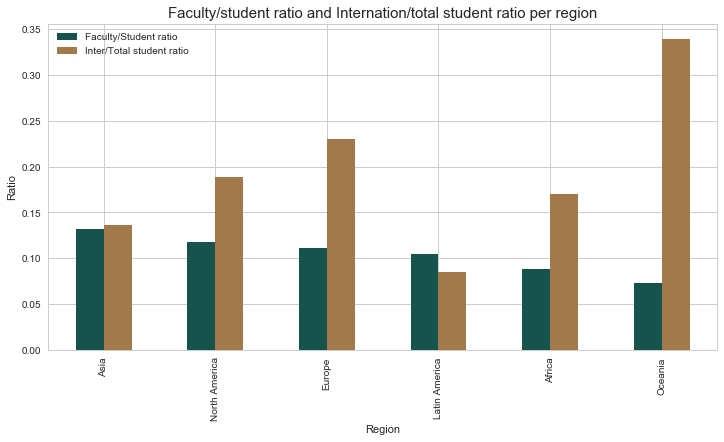

In [85]:
#importing libaries and setting style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('cubehelix',3)

#Creating new dataframe only containing relevant data
topuni_region_df_plot = topuni_region_df.drop(['Total Students', 'International Students','Total Faculty','International Faculty'], axis=1)
topuni_region_df_plot = topuni_region_df_plot.sort_values('Faculty/Student ratio',ascending=False)
topuni_region_df_plot = topuni_region_df_plot.set_index('region')


#Plotting and adding info
topuni_region_df_plot.plot.bar(figsize=(12,6))

plt.title('Faculty/student ratio and Internation/total student ratio per region',fontsize=15)
plt.ylabel('Ratio')
plt.xlabel('Region')
plt.show()

Here we see a plot where the ratios between both *international/total number of students* and *faculty members/students* are plotted together as an average per region. The plot is sorted after the faculty/student ratio and as we can observe that there doesn't really seem to be any correlation between the two ratios. However that will be further examined later.


We will now look at the same type of plot but with an average calculated per country.

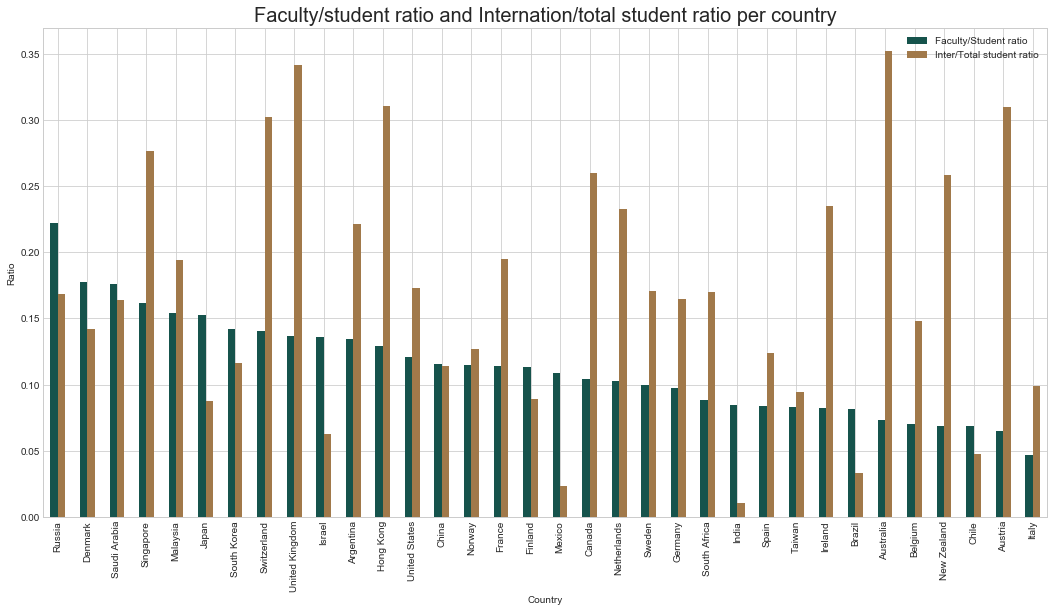

In [116]:
#Creating new dataframe with relevant data
topuni_country_df_plot = topuni_country_df.drop(['Total Students', 'International Students','Total Faculty','International Faculty'], axis=1)
topuni_country_df_plot = topuni_country_df_plot.sort_values('Faculty/Student ratio',ascending=False)
topuni_country_df_plot = topuni_country_df_plot.set_index('country') 

#plotting and adding info
topuni_country_df_plot.plot.bar(figsize=(18,9))

plt.title('Faculty/student ratio and Internation/total student ratio per country',fontsize=20)
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.show()

Here we have a similar plot as the previous one but here with the data aggregated per country. It gives a clear visual idea of how the countries are performing against each other on this issue.


The last thing that will be plotted for now is the average ranking per country. Here we need a bit more coding as we are now going back to the original Dataframe topuni_df and modifying that. We get rid of unrelevant columns and take the mean of the rankings calculated per country. Note that we first need to remove the '=' that sometimes appears in the ranks and make the values numeric in order to calculate the mean.

In [239]:
#Making the dataframe ready for plotting
topuni_df_rank = topuni_df.drop(['title','Total Students','International Students','Total Faculty','International Faculty','Faculty/Student ratio','Inter/Total student ratio'],axis=1)
topuni_df_rank['rank_display'] = topuni_df_rank['rank_display'].map(lambda x: x.replace('=','')) #Removing '='
topuni_df_rank['rank_display'] = pd.to_numeric(topuni_df_rank['rank_display']) #Making the rankings numeric
topuni_df_rank = topuni_df_rank.groupby('country',as_index=False).mean() #Calculating the ranking means

topuni_df_rank = topuni_df_rank.set_index('country')
topuni_df_rank = topuni_df_rank.sort_values('rank_display')

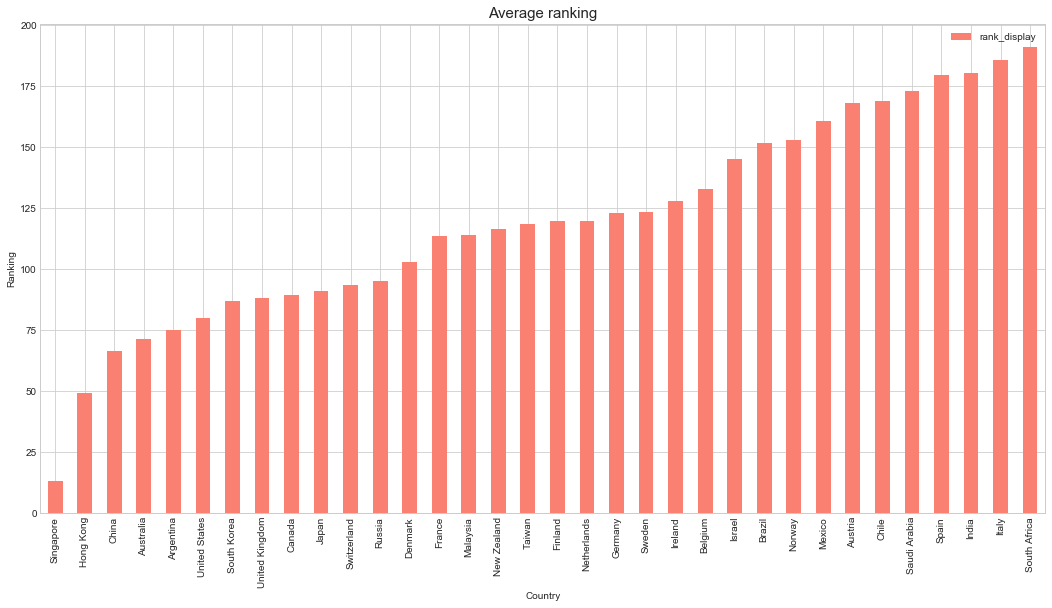

In [243]:
#Plotting and adding info
topuni_df_rank.plot.bar(figsize=(18,9),color='salmon')

plt.title('Average ranking',fontsize=15)
plt.ylabel('Ranking')
plt.xlabel('Country')
plt.show()

Here we see a plot of the average ranking per country. Note that it is here the country with the lowest score that of course has the best rankings on average.

### Task 2:
Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)).

In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total).

Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

In order to extract this information, we first examined the webpage using Postman Interceptor. We discovered that the data is not found in the html, rather it is imported from a [json file](https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json) requested from the server.

So we make a request for this same file, and import the data from the json to a dataframe.

Since the data is sorted, we trim the dataframe to have only the top 200 results. Thus we have the Name, Rank, Country and Region for each of these universities. We drop the columns we do not require.

In order to get the remaining data, we keep the url column for now.

In [51]:
#import timesedu data
timesedu_url = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
request = requests.get(timesedu_url)
timesedu_data = request.json()['data']

#add data to dataframe
timesedu_df = pd.io.json.json_normalize(timesedu_data)

#trim data frame to top 200 universities
timesedu_df = timesedu_df.head(200)

#drop columns that we don't need
timesedu_df = timesedu_df.drop(["member_level","nid","url","scores_international_outlook","scores_international_outlook_rank","scores_overall","scores_overall_rank","record_type","scores_research","scores_research_rank","scores_teaching","scores_teaching_rank","stats_female_male_ratio","subjects_offered","scores_citations","scores_citations_rank","scores_industry_income","scores_industry_income_rank"],axis=1)

In [52]:
#addRegions
mappingDict = {}
for row in topuni_df.iterrows():
    mappingDict[row[1][0]] = row[1][2]

#manually adding missing countries/alternative spellings in dict
mappingDict['Luxembourg'] = 'Europe'
mappingDict['Russian Federation'] = 'Europe'

timesedu_df['Region'] = timesedu_df['location'].map(mappingDict)

In [53]:
#adding columns for international students
timesedu_df["Total Students"] = timesedu_df['stats_number_students'].map(lambda x : x.replace(',',''))
timesedu_df["Inter/Total student ratio"] = (timesedu_df['stats_pc_intl_students'].map(lambda x : x.replace('%','')).map(int))/100
timesedu_df["International Students"] = ((timesedu_df['Total Students'].map(float))*(timesedu_df['Inter/Total student ratio'].map(float))).map(int)

# #adding columns for total faculty and international faculty
timesedu_df["Total Faculty"] = (timesedu_df["Total Students"].map(float)/timesedu_df["stats_student_staff_ratio"].map(float)).map(int)
timesedu_df["International Faculty"] = float('NaN')
timesedu_df["Faculty/Student ratio"] = 1/timesedu_df["stats_student_staff_ratio"].map(float)

timesedu_df = timesedu_df.drop(["stats_number_students","stats_pc_intl_students","stats_student_staff_ratio"],axis=1)



We now have all the data from Times Higher Education in a single dataframe. In order to answer question a) through d) using this data, we will exclude a few more rows that are not relevant for those questions. It should be noted that the ranking are already in the dataframe timesedu_df and therefore all we need is to sort the data (and group it for questio c and d).

In [273]:
#New dataframe with fewer columns
timesedu_df2 = timesedu_df.drop(['aliases','rank_order'],axis=1)

#Reordering the columns
timesedu_df2 = timesedu_df2[['name','location','Region','rank','Total Students','International Students','Total Faculty','International Faculty','Faculty/Student ratio','Inter/Total student ratio']]

#Changing column names
timesedu_df2.columns.values[0] = 'Name' 
timesedu_df2.columns.values[1] = 'Location' 
timesedu_df2.columns.values[3] = 'Rank' 

#### a) Which are the best universities in terms of the ratio between faculty members and students?
To answer this question we just sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 faculty : 5 students is better than 1 faculty : 10 students)

In [274]:
timesedu_df2.sort_values('Faculty/Student ratio',ascending=False).head(3)

,Name,Location,Region,Rank,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
105,Vanderbilt University,United States,North America,=105,12011,1561,3639,NaN,0.303030,0.13
109,University of Copenhagen,Denmark,Europe,=109,30395,4255,7413,NaN,0.243902,0.14
153,University of Rochester,United States,North America,=153,9636,2794,2240,NaN,0.232558,0.29


We see that the best university when it comes to faculty/student ratio is __Vanderbilt University in USA__.

#### b) Which are the best universities in terms of the ratio of international students
To answer this question we will simply sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 international : 5 total is better than 1 international : 10 total)

In [275]:
timesedu_df2.sort_values('Inter/Total student ratio',ascending=False).head(3)

,Name,Location,Region,Rank,Total Students,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
24,London School of Economics and Political Science,United Kingdom,Europe,=25,10065,7146,825,NaN,0.081967,0.71
178,University of Luxembourg,Luxembourg,Europe,=179,4969,2832,340,NaN,0.068493,0.57
37,École Polytechnique Fédérale de Lausanne,Switzerland,Europe,=38,9928,5460,886,NaN,0.089286,0.55


We observe that __London School of Economics and Political Science__ is the best in order of ration between international and total amount of students.

#### c) Aggregate by country
To answer this question we will aggregate all the values by country and while doing so calculating the mean of all the numeric values.

In [276]:
timesedu_df2.groupby('Location',as_index=False).mean().sort_values('Faculty/Student ratio',ascending=False).head(3)

,Location,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
5,Denmark,3108.666667,3532.0,NaN,0.160166,0.166667
11,Italy,66.000000,78.5,NaN,0.138889,0.105000
17,Russian Federation,6431.000000,4004.0,NaN,0.136986,0.220000


In [277]:
timesedu_df2.groupby('Location',as_index=False).mean().sort_values('Inter/Total student ratio',ascending=False).head(3)

,Location,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
13,Luxembourg,2832.000000,340.000000,NaN,0.068493,0.570000
25,United Kingdom,6872.419355,1433.064516,NaN,0.074252,0.365484
9,Hong Kong,5031.400000,828.000000,NaN,0.056622,0.328000


We see that the country with the best Faculty/Student ratio is __Denmark__ and the country with the best International/total student ration is __Luxembourg__.

#### d) Aggregate by region
To answer this question we will add aggregate all the values by region while calculating the means.

In [278]:
timesedu_df2.groupby('Region',as_index=False).mean().sort_values('Faculty/Student ratio',ascending=False).head(3)

,Region,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
3,North America,4944.705882,2434.602941,NaN,0.101655,0.185588
0,Africa,3739.000000,1775.000000,NaN,0.085470,0.180000
1,Asia,3753.666667,2029.904762,NaN,0.080345,0.165238


In [279]:
timesedu_df2.groupby('Region',as_index=False).mean().sort_values('Inter/Total student ratio',ascending=False).head(3)

,Region,International Students,Total Faculty,International Faculty,Faculty/Student ratio,Inter/Total student ratio
4,Oceania,10289.666667,1283.444444,NaN,0.039895,0.305556
2,Europe,4767.623762,1255.603960,NaN,0.065952,0.244653
3,North America,4944.705882,2434.602941,NaN,0.101655,0.185588


We see that the regions who perform best are: __North America__ with respect to Faculty/Student ratio and __Oceania__ with respect to International/Total student ratio.

### Visualization

We will now do some visualizations of the data from Times Higher Education, so that we visually can interpret the differences between the two datasources.

We start of by creating a dataframe that only contains the ratios and is aggregated by region.

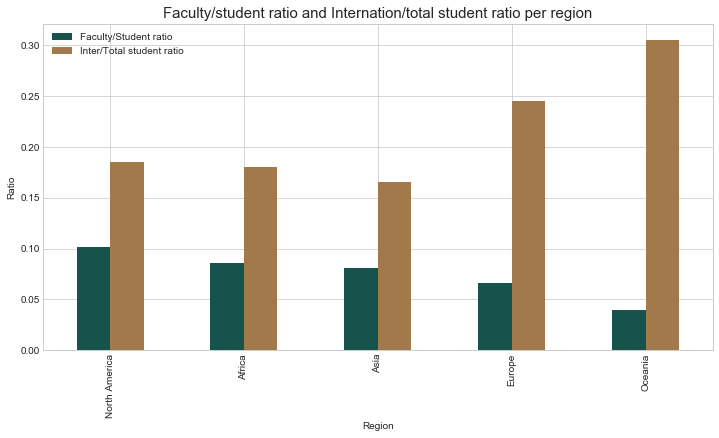

In [280]:
#Creating new dataframe only containing relevant data
timesedu_region_df_plot = timesedu_df2.drop(['Location','Name','Rank','Total Students','International Students','Total Faculty','International Faculty'], axis=1)
timesedu_region_df_plot = timesedu_region_df_plot.groupby('Region',as_index=False).mean()
timesedu_region_df_plot = timesedu_region_df_plot.sort_values('Faculty/Student ratio',ascending=False)
timesedu_region_df_plot = timesedu_region_df_plot.set_index('Region')


#Plotting and adding info
timesedu_region_df_plot.plot.bar(figsize=(12,6))

plt.title('Faculty/student ratio and Internation/total student ratio per region',fontsize=15)
plt.ylabel('Ratio')
plt.xlabel('Region')
plt.show()

Here we see the two ratio calculated per region and it is a bit different from the corresponding one based on the data from Top Rankings. The most obvious difference is that Latin America doea not appear as a region here. This is due to the fact that no univeristy from that region is within the top 200 universities according to Times Higher Education. We will go a bit futher in to analysis of the differences between the two ranking in the next task.

Next up is the same type of plot but aggregated per country.

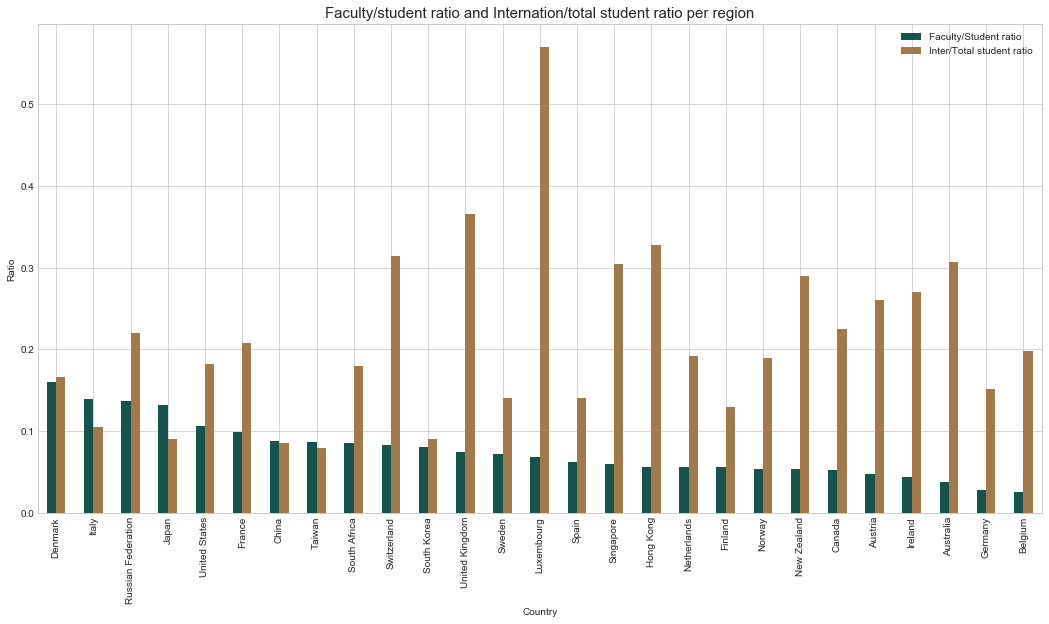

In [282]:
#Creating new dataframe only containing relevant data
timesedu_country_df_plot = timesedu_df2.drop(['Region','Name','Rank','Total Students','International Students','Total Faculty','International Faculty'], axis=1)
timesedu_country_df_plot = timesedu_country_df_plot.groupby('Location',as_index=False).mean()
timesedu_country_df_plot = timesedu_country_df_plot.sort_values('Faculty/Student ratio',ascending=False)
timesedu_country_df_plot = timesedu_country_df_plot.set_index('Location')


#Plotting and adding info
timesedu_country_df_plot.plot.bar(figsize=(18,9))

plt.title('Faculty/student ratio and Internation/total student ratio per region',fontsize=15)
plt.ylabel('Ratio')
plt.xlabel('Country')
plt.show()

### Task 3 :
In this section, we will merge the two dataframes into one using the names of the universities as a link between them.
However, some of these names are different in each dataframes;
for example, EPFL is represented as *Ecole Polytechnique Fédérale de Lausanne (EPFL)* in the the Top Universities ranking and *École Polytechnique Fédérale de Lausanne* in the Times Education ranking.

In this case, the `merge` operation wouldn't work unless we simplify the name strings and remove the elements that might create a difference between the two lists.
Here is a list of operations we perform on both the 'aliases' column in Top Universities ranking and the 'title' in the  Times Education ranking to make them closer : 
- We turn them into lowercase
- Using Regular Expressions, we delete the acronyms in parenthesis
- we replace all non- alphanumerical characters (for example - , _ ,...) with a simple whitespace
- we remove the accents that are present in the french names, replacing 'é' and 'è' by e.



In [54]:
import re
  # treating the universities titles from Top Universites :
#create an empty list and save the "treated" name strings in it 
new_name2=[]
for name in topuni_df.title:
    words=name.lower()
    words=re.sub("(\s+\(\w+\))",'', words)
    words=re.sub("(the+\s)",'', words)
    words = re.sub('\W+',' ',words)
    words = re.sub('é|è','e',words)
    new_name2.append(words)
#add the list as a column to the Top University dataframe
topuni_df['name_for_merge']=new_name2
 

  # treating the universities titles from Times Education :
#create an empty list and save the "treated" name strings in it 
new_name3=[]
for nam in timesedu_df.name:
    words=nam.lower()
    words=re.sub("(\s+\(\w+\))",'', words)
    words=re.sub("(the+\s)",'', words)
    words = re.sub('\W+',' ',words)
    words = re.sub('é|è','e',words)
    new_name3.append(words)
#add the list as a column to the Times Education dataframe
timesedu_df['name_for_merge']=new_name3

Having performed these operations, we save the new names in a new column in each dataframe called `name_for_merge`.
We now perform an *outer* merge based on these new names.

In [56]:
#merging the two dataframes
test3=pd.merge(topuni_df,timesedu_df,on='name_for_merge',how='outer')
test3

,country,rank_display,region,title,Total Students_x,International Students_x,Total Faculty_x,International Faculty_x,Faculty/Student ratio_x,Inter/Total student ratio_x,...,name,rank,rank_order,Region,Total Students_y,Inter/Total student ratio_y,International Students_y,Total Faculty_y,International Faculty_y,Faculty/Student ratio_y
0,United States,1,North America,Massachusetts Institute of Technology (MIT),11067.0,3717.0,2982.0,1679.0,0.269450,0.335863,...,Massachusetts Institute of Technology,5,50,North America,11177,0.34,3800.0,1284.0,NaN,0.114943
1,United States,2,North America,Stanford University,15878.0,3611.0,4285.0,2042.0,0.269870,0.227422,...,Stanford University,=3,40,North America,15845,0.22,3485.0,2112.0,NaN,0.133333
2,United States,3,North America,Harvard University,22429.0,5266.0,4350.0,1311.0,0.193945,0.234785,...,Harvard University,6,60,North America,20326,0.26,5284.0,2283.0,NaN,0.112360
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0,0.422616,0.286918,...,California Institute of Technology,=3,30,North America,2209,0.27,596.0,339.0,NaN,0.153846
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0,0.292488,0.356899,...,University of Cambridge,2,20,Europe,18389,0.35,6436.0,1687.0,NaN,0.091743
5,United Kingdom,6,Europe,University of Oxford,19720.0,7353.0,6750.0,2964.0,0.342292,0.372870,...,University of Oxford,1,10,Europe,20409,0.38,7755.0,1822.0,NaN,0.089286
6,United Kingdom,7,Europe,UCL (University College London),31080.0,14854.0,6345.0,2554.0,0.204151,0.477928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Kingdom,8,Europe,Imperial College London,16090.0,8746.0,3930.0,2071.0,0.244251,0.543567,...,Imperial College London,8,80,Europe,15857,0.55,8721.0,1390.0,NaN,0.087719
8,United States,9,North America,University of Chicago,13557.0,3379.0,2449.0,635.0,0.180645,0.249244,...,University of Chicago,9,90,North America,13525,0.25,3381.0,2181.0,NaN,0.161290
9,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,19815.0,7563.0,2477.0,1886.0,0.125006,0.381681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The resulting dataframe is composed of 141 universities and 23 variables. It means that there are 59 universities that were not matched correctly during the merge.
This can be due either to:
- the fact that some universities are present in only one of the rankings or
- the fact that they are not represented in the same way in both, even after the simplications performed above.

In the first case,the universities will be removed, in the second, the matching has to be done manually. We view these universities here.

In [57]:
#names of the universities from the Top University ranking 
#that are not matched to universities from the Times Education Ranking
a=pd.Series(test3[test3.title.isnull()]['name_for_merge'].values)
a.name='Top Universities Ranking'
print(a.shape)

#names of the universities from the Times Education Ranking 
#that are not matched to universities from the Top University ranking
b=pd.Series(test3[test3.aliases.isnull()]['name_for_merge'].values)
b.name='Times Education Ranking'
print(b.shape)
pd.concat([a,b],axis=1).head(10)

(59,)
(59,)


,Top Universities Ranking,Times Education Ranking
0,eth zurich swiss federal institute of technolo...,ucl university college london
1,university college london,eth zurich swiss federal institute of technology
2,lmu munich,kaist korea advanced institute of science tech...
3,karolinska institute,ecole normale superieure paris
4,heidelberg university,university of new south wales unsw sydney
5,university of north carolina at chapel hill,tokyo institute of technology
6,humboldt university of berlin,osaka university
7,wageningen university research,ludwig maximilians universität münchen
8,paris sciences et lettres psl research univers...,ruprecht karls universität heidelberg
9,university of freiburg,universidad de buenos aires


The manual matching goes as follow: 

   - We create a list of unmatched university titles from the Top Universities dataframe (which we call 'a' here)
    and another list of unmatched university names from the Times Education dataframe (which we call match_list)
    
   - We pick a university name from the 'a' list - we call it A.
    
   - We goes through the match_list names and count the number of words each item has in common with A.
    
   - The name corresponding to A in match_list is likely to have the most words in commun with it.
    So if we sort match_list according to that, we can take the first item as A's match.This part is done manually to avoid errors.


In [68]:
#create a dataFrame containing the unmatched names from Top Universities
a=pd.DataFrame(test3[test3.title.isnull()]['name_for_merge'])

#add a new column to each name where we will store the corresponding index #
a['correspond']=0

#Create a dataFrame containing the unmatched names from Times Education
match_list=pd.DataFrame(test3[test3.name.isnull()]['name_for_merge'])



In [69]:
#we split each unmatched name in Top University it into a list of words and store them in 'check'
j=200
print(a.name_for_merge[j])
check=a.name_for_merge[j].split()

eth zurich swiss federal institute of technology zurich


In [70]:
score=[]
# for each unmatched name in Times Education, we count how many words of 'check' it contains 
for i in match_list.name_for_merge:
    k=0
    for word in check:
        if i.find(word)>0:
            k=k+1
    score.append(k)
#We store the number of the commun words in a new column 'score'
#Then we view the names with the largest scores. 
#If the university is represented by a similar name in the other ranking,
#this name should be on the top of this list and we can extract its index

match_list['score']=score
    
match_list.sort_values('score',ascending=False).head(10)

,name_for_merge,score
9,eth zurich swiss federal institute of technology,7
40,kaist korea advanced institute of science tech...,3
178,indian institute of technology bombay,3
55,tokyo institute of technology,3
106,kit karlsruhe institute of technology,3
171,indian institute of technology delhi,3
132,chalmers university of technology,2
184,vienna university of technology,2
189,indian institute of science bangalore,2
175,university of technology sydney,2


In [76]:
#We copy the content of the second ranking at the correct index
m=9
test3.iloc[m,11:]=test3.iloc[j,11:]
test3.iloc[m]

country                                                              Switzerland
rank_display                                                                  10
region                                                                    Europe
title                          ETH Zurich - Swiss Federal Institute of Techno...
Total Students_x                                                           19815
International Students_x                                                    7563
Total Faculty_x                                                             2477
International Faculty_x                                                     1886
Faculty/Student ratio_x                                                 0.125006
Inter/Total student ratio_x                                             0.381681
name_for_merge                  eth zurich swiss federal institute of technology
aliases                        ETH Zurich – Swiss Federal Institute of Techno...
location                    

In [79]:
#We reorder the dataframe and drop the universities left unmatched
final=test3.iloc[:,[1,14,2,0,3,11,4,17,5,19,6,20,7,21,8,22,9,18]]
final=final.dropna(thresh=13)

In [81]:
final.head(10)

,rank_display,rank,region,country,title,aliases,Total Students_x,Total Students_y,International Students_x,International Students_y,Total Faculty_x,Total Faculty_y,International Faculty_x,International Faculty_y,Faculty/Student ratio_x,Faculty/Student ratio_y,Inter/Total student ratio_x,Inter/Total student ratio_y
0,1,5,North America,United States,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology,11067.0,11177,3717.0,3800.0,2982.0,1284.0,1679.0,NaN,0.269450,0.114943,0.335863,0.34
1,2,=3,North America,United States,Stanford University,Stanford University,15878.0,15845,3611.0,3485.0,4285.0,2112.0,2042.0,NaN,0.269870,0.133333,0.227422,0.22
2,3,6,North America,United States,Harvard University,Harvard University,22429.0,20326,5266.0,5284.0,4350.0,2283.0,1311.0,NaN,0.193945,0.112360,0.234785,0.26
3,4,=3,North America,United States,California Institute of Technology (Caltech),California Institute of Technology caltech,2255.0,2209,647.0,596.0,953.0,339.0,350.0,NaN,0.422616,0.153846,0.286918,0.27
4,5,2,Europe,United Kingdom,University of Cambridge,University of Cambridge,18770.0,18389,6699.0,6436.0,5490.0,1687.0,2278.0,NaN,0.292488,0.091743,0.356899,0.35
5,6,1,Europe,United Kingdom,University of Oxford,University of Oxford,19720.0,20409,7353.0,7755.0,6750.0,1822.0,2964.0,NaN,0.342292,0.089286,0.372870,0.38
7,8,8,Europe,United Kingdom,Imperial College London,Imperial College London,16090.0,15857,8746.0,8721.0,3930.0,1390.0,2071.0,NaN,0.244251,0.087719,0.543567,0.55
8,9,9,North America,United States,University of Chicago,University of Chicago,13557.0,13525,3379.0,3381.0,2449.0,2181.0,635.0,NaN,0.180645,0.161290,0.249244,0.25
9,10,=10,Europe,Switzerland,ETH Zurich - Swiss Federal Institute of Techno...,ETH Zurich – Swiss Federal Institute of Techno...,19815.0,19233,7563.0,7308.0,2477.0,1317.0,1886.0,NaN,0.125006,0.068493,0.381681,0.38
10,11,52,Asia,Singapore,"Nanyang Technological University, Singapore (NTU)","Nanyang Technological University, Singapore N...",25738.0,25499,7251.0,7904.0,4338.0,1564.0,2993.0,NaN,0.168545,0.061350,0.281724,0.31


In [ ]:
#we save the resulting dataframe into a .csv file
#in order to use at reference for the rest of the assignment so that for the rest of the assignment.
#final.to_csv("final.csv")


### Task 4 
Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members

In [82]:
test4 = pd.read_csv("final.csv")
test4['rank_display']=test4['rank_display'].map(lambda x : float(x.replace('=','')))
test4['rank']=test4['rank'].map(lambda x : float(x.replace('=','')))


Joining the two dataframes enables us to compare the rankings of the universities and the factors that helped determine it.

We notice that the 6 first universities are the same in both rankings, all from USA or the UK.
For other universities, the ranks are  often close, although in some cases it varies significantly ( 
Nanyang Technological University, Singapore (NTU) who is $11^{th}$ in *Top Universities* and $52^{nd}$ in *Times Education*).

This is illustrated by the scatter plot below: The top ranks ,between 1 and 20 are grouped in an almost-linear way however as the rank increases, the points becomes more and more scattered.

Populating the interactive namespace from numpy and matplotlib


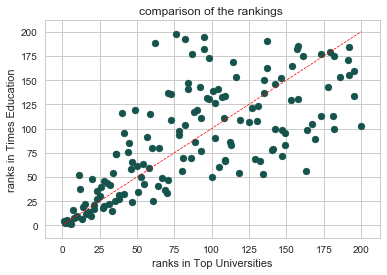

In [86]:
%pylab inline
plt.plot(test4.rank_display,test4.rank_display,linestyle='--', color='red', linewidth=0.75)
scatter(test4.rank_display,test4['rank'])
plt.ylabel('ranks in Times Education')
plt.xlabel('ranks in Top Universities')    
plt.title('comparison of the rankings ')

These differences are due to the fact that the ranking scores are computed differently in each dataframe.

The scores are computed as a combination of various indicators such as the number of students,the size of the faculty, the international dimension, etc...

In this section, we will analyze the correlations between these variables and the ranks of both dataframes. 

Top University:-0.0397992544426
Times Education:-0.14343918041


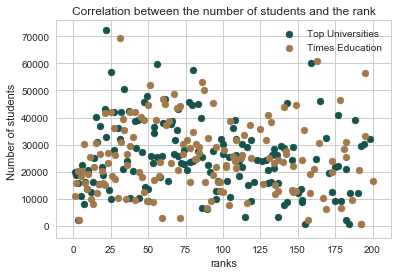

In [87]:
sc1=scatter(test4['rank'],test4['Total_Students_x'],label='Top Universities')
sc2=scatter(test4['rank_display'],test4['Total_Students_y'],label='Times Education')
plt.ylabel('Number of students ')
plt.xlabel('ranks')    
plt.title('Correlation between the number of students and the rank')
plt.legend(handles=[sc1,sc2])
print('Top University:'+str(test4.Total_Students_x.corr(test4.rank_display)))
print('Times Education:'+str(test4.Total_Students_y.corr(test4['rank'])))

From the plot and the correlations, we can see that there is no relation between the size of the university and its ranking.

Top University:-0.383008756049
Times Education:-0.139645176992


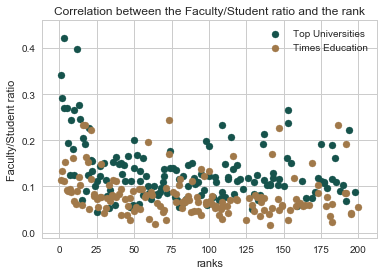

In [88]:
scatter(test4['rank'],test4['Faculty/Student_ratio_x'],label='Top Universities')
scatter(test4['rank_display'],test4['Faculty/Student_ratio_y'],label='Times Education')
plt.ylabel('Faculty/Student ratio')
plt.xlabel('ranks')    
plt.title('Correlation between the Faculty/Student ratio and the rank')
plt.legend(handles=[sc1,sc2])
print('Top University:'+str(test4['Faculty/Student_ratio_x'].corr(test4.rank_display)))
print('Times Education:'+str(test4['Faculty/Student_ratio_y'].corr(test4['rank'])))

The top Universities ranking seems to give more importance to the Faculty/Student Ratio. Indeed the correlation between the ranks and the Faculty/student ratio is higher for this ranking. 
We also notice on the plot that the faculty ratios are not the same in both ranking; this might be due to the fact that the definition of *faculty member* is different.  

Correlation between the ratio of international students and the rank:
Top University:-0.306241834498
Times Education:-0.189792452195


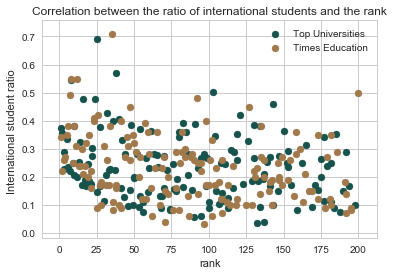

In [89]:
print('Correlation between the ratio of international students and the rank:')
print('Top University:'+str(test4['Inter/Total_student_ratio_x'].corr(test4.rank_display)))
print('Times Education:'+str(test4['Inter/Total_student_ratio_y'].corr(test4['rank'])))

scatter(test4['rank'],test4['Inter/Total_student_ratio_x'],label='Top Universities')
scatter(test4['rank_display'],test4['Inter/Total_student_ratio_y'],label='Times Education')
plt.ylabel('International student ratio ')
plt.xlabel('rank')    
plt.title('Correlation between the ratio of international students and the rank')
plt.legend(handles=[sc1,sc2])


There is no significant correlation between the rank and the proportion of international students, although universities at the top of the rankings tend to have high International students ratios. 

Top University:0.0901555693398
Times Education:-0.0592779150172


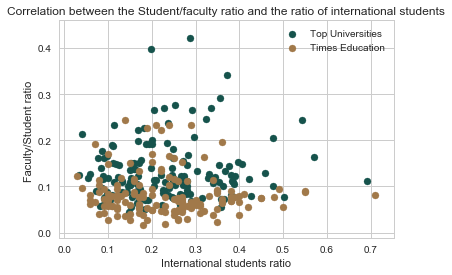

In [90]:
scatter(test4['Inter/Total_student_ratio_x'],test4['Faculty/Student_ratio_x'],label='Top Universities')
scatter(test4['Inter/Total_student_ratio_y'],test4['Faculty/Student_ratio_y'],label='Times Education')
plt.ylabel('Faculty/Student ratio ')
plt.xlabel('International students ratio')    
plt.title('Correlation between the Student/faculty ratio and the ratio of international students')
plt.legend(handles=[sc1,sc2])

print('Top University:'+str(test4['Faculty/Student_ratio_x'].corr(test4['Inter/Total_student_ratio_x'])))
print('Times Education:'+str(test4['Faculty/Student_ratio_y'].corr(test4['Inter/Total_student_ratio_y'])))

There is no correlation between the proportion of international students and the Faculty/Student ratio.

Correlation between the number of international students and the number of international faculty staff
Top Universities Ranking:0.657111614273


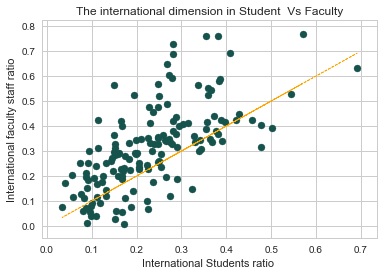

In [91]:
scatter(test4['Inter/Total_student_ratio_x'],(test4['International_Faculty_x']/test4['Total_Faculty_x']),label='Top Universities')
plt.plot(test4['Inter/Total_student_ratio_x'],test4['Inter/Total_student_ratio_x'],linestyle='--', color='orange', linewidth=0.75)
plt.ylabel('International faculty staff ratio')
plt.xlabel('International Students ratio ')    
plt.title('The international dimension in Student  Vs Faculty')
print('Correlation between the number of international students and the number of international faculty staff')
print('Top Universities Ranking:'+str(test4['Inter/Total_student_ratio_x'].corr(test4['International_Faculty_x']/test4['Total_Faculty_x'])))



According to the Top Universities Ranking, there is a notable correlation between the proportion of international student and the proportion of international faculty members.

Top University:-0.191279056572
Times Education:-0.298635933071


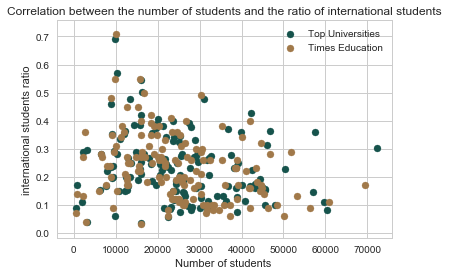

In [92]:
scatter(test4['Total_Students_x'],test4['Inter/Total_student_ratio_x'],label='Top Universities')
scatter(test4['Total_Students_y'],test4['Inter/Total_student_ratio_y'],label='Times Education')
plt.xlabel('Number of students ')
plt.ylabel('international students ratio')    
plt.title('Correlation between the number of students and the ratio of international students')
plt.legend(handles=[sc1,sc2])


print('Top University:'+str(test4.Total_Students_x.corr(test4['Inter/Total_student_ratio_x'])))
print('Times Education:'+str(test4.Total_Students_y.corr(test4['Inter/Total_student_ratio_y'])))

It seems that smaller universities tend to have a larger proportion of international students, although the correlation is not very strong.

Top University:-0.42568748512
Times Education:-0.372852941884


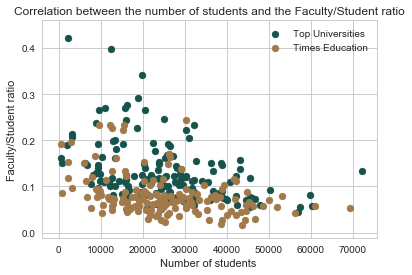

In [93]:
scatter(test4['Total_Students_x'],test4['Faculty/Student_ratio_x'],label='Top Universities')
scatter(test4['Total_Students_y'],test4['Faculty/Student_ratio_y'],label='Times Education')
plt.xlabel('Number of students ')
plt.ylabel('Faculty/Student ratio')    
plt.title('Correlation between the number of students and the Faculty/Student ratio')
plt.legend(handles=[sc1,sc2])

print('Top University:'+str(test4.Total_Students_x.corr(test4['Faculty/Student_ratio_x'])))
print('Times Education:'+str(test4.Total_Students_y.corr(test4['Faculty/Student_ratio_y'])))

Smaller universities also tend to have a better Faculty/Student ratio, but here again the correlations are not significantly large.

## task 5 :
Can you find the best university taking in consideration both rankings? Explain your approach.


In [95]:
rank3 = pd.DataFrame((test4['rank']+test4['rank_display'])/2)
rank3.columns=['average']
rank3['sd']=((test4['rank']-rank3['average'])**2+(test4['rank_display']-rank3['average'])**2)**.5
rank3['uni']=test4['title']
rank3['rang_1']=test4['rank']
rank3['rang_2']=test4['rank_display']

rank3.sort_values(['average','sd']).head(10)


,average,sd,uni,rang_1,rang_2
1,2.5,0.707107,Stanford University,3.0,2.0
0,3.0,2.828427,Massachusetts Institute of Technology (MIT),5.0,1.0
3,3.5,0.707107,California Institute of Technology (Caltech),3.0,4.0
4,3.5,2.121320,University of Cambridge,2.0,5.0
5,3.5,3.535534,University of Oxford,1.0,6.0
2,4.5,2.121320,Harvard University,6.0,3.0
7,8.0,0.000000,Imperial College London,8.0,8.0
8,9.0,0.000000,University of Chicago,9.0,9.0
9,10.0,0.000000,ETH Zurich - Swiss Federal Institute of Techno...,10.0,10.0
12,10.0,4.242641,Princeton University,7.0,13.0
